# Region and Domain

In this short analysis, I would like to investigate a stock index as the proxy for **Financial activities** in **Frankfurt am Main, Hesse, Germany**. In details, I will investigate the volatility of the DAX30 index, a stock market index consisting of the 30 major German blue chip companies trading on the **Frankfurt Stock Exchange**. In short, the region and domain of this analysis are:

* Frankfurt am Main, Hesse, German
* DAX30 index of the Frankfurt Stock Exchange

Some entries of the index are shown below as examples of how the data looks like:

In [1]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#set time frame
start = dt.datetime(2001, 1, 1)
end = dt.datetime.now()

data = web.DataReader('^GDAXI', 'yahoo', start, end)
data.head().round(decimals = 2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,6439.23,6289.82,6431.14,6289.82,31868400.0,6289.82
2001-01-03,6467.82,6172.44,6284.87,6434.96,47080000.0,6434.96
2001-01-04,6556.94,6356.92,6443.87,6376.54,71143100.0,6376.54
2001-01-05,6485.34,6344.16,6383.33,6382.31,65345100.0,6382.31
2001-01-08,6426.64,6337.95,6368.83,6392.17,38720900.0,6392.17


# Research Question

The data presents many time series that volatile over time. There are many possible causes for the variation of a time series, either some driving factors, trend, or seasonal effects. This knowledge is important for forecasting the future price of this index and so is valuable to stockbrokers for their trading decisions. Hence, I would like to know whether this volatility is only caused by economic factors or there are also some seasonal effects that contribute to this variation from Jan 1, 2001 to the date this assignment is prepared. The research question can be simply stated as follows:

**"Which factors in the long time trend (caused by economic variations) and seasonal effects (caused by times of the year) are the main contributor to the volatility of the DAX30 index from Jan 1, 2001 to May 17, 2022".**

# Data sources

The data of DAX30 can be fetched directly from Yahoo! Finance, in Python this can be done by employing the library `pandas_datareader`. For a direct view, it can be inspected using the following links (shortened):

1. [Google](https://bit.ly/3Lm0A5X)
2. [Yahoo! Finance](https://yhoo.it/3PCd78K)

The first link provides the description and explanation of the index and the second presents the up-to-date DAX30 data together with a downloadable link for viewing outside of Python. The analysis employed in this Assignment does not use data from these sources but fetches the time series directly from Yahoo! Finance, so these are just for presentation.

# Image of the visualization

The idea of the visualization is that intraperiod price distributions of the data grouped by year, month, and week day are visualized by boxplots which are then compared in order to detect the correlation among them. The Python codes are presented as follows.

Firstly, the data is pre-processed to make it more convenient for the visualization. Only the adjusted closing prices are used to construct the visualization so it is presented along side with the newly generated datetime data.

In [2]:
# Filling null value by forward filling method
for i in ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']:
    data[i] = data[i].ffill()
data = data.reset_index()

# Checking trends and seasonality in the data by creating separate columns for time data
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = [d.strftime('%b') for d in data.Date]
data['Day'] = pd.DatetimeIndex(data['Date']).dayofweek
data.set_index('Date',inplace=True)
data[['Adj Close', 'Year', 'Month', 'Day']].head().round(decimals = 2)

,Adj Close,Year,Month,Day
Date,,,,
2001-01-02,6289.82,2001,Jan,1
2001-01-03,6434.96,2001,Jan,2
2001-01-04,6376.54,2001,Jan,3
2001-01-05,6382.31,2001,Jan,4
2001-01-08,6392.17,2001,Jan,0


Then, I choose boxplots as the means for expressing closing price distribution in each hypothetical category. This can be achieved easily by using the library `Seaborn`.

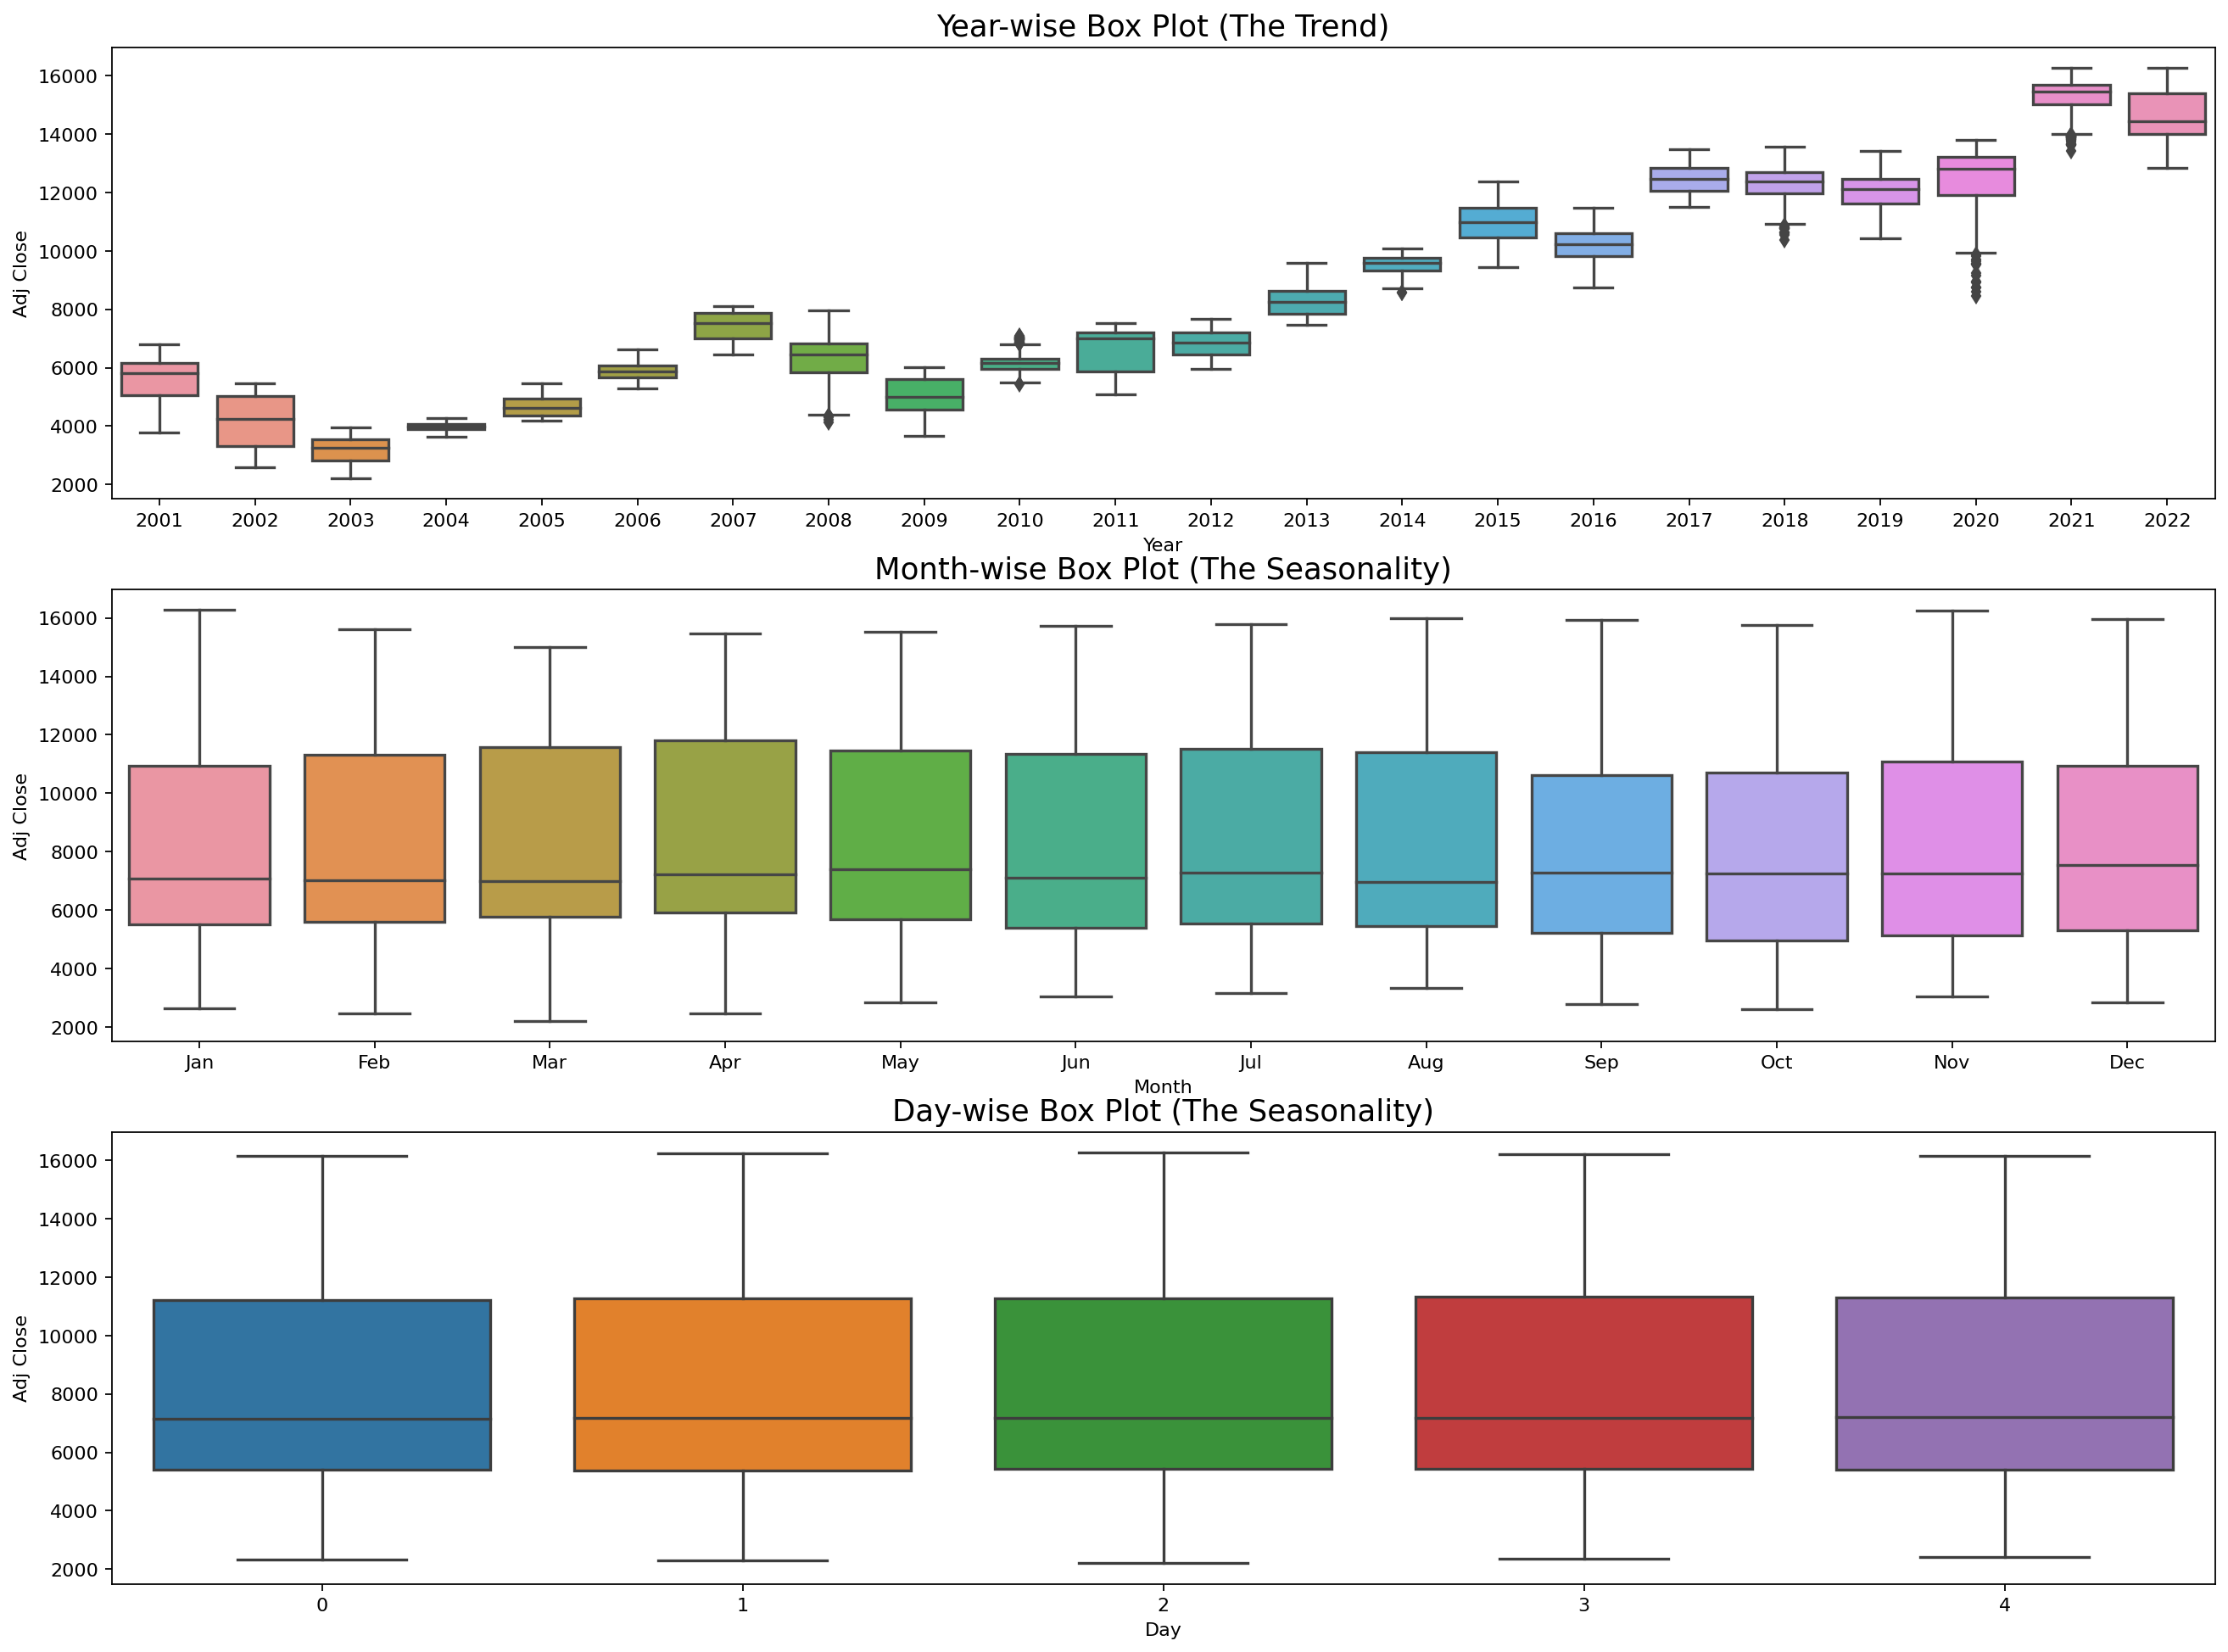

In [3]:
# Plotting visualization
fig, axes = plt.subplots(3, 1, figsize = (20, 15), dpi = 160)
sns.boxplot(x = 'Year', y = 'Adj Close', data = data, ax = axes[0])
sns.boxplot(x = 'Month', y = 'Adj Close', data = data, ax = axes[1])
sns.boxplot(x = 'Day', y = 'Adj Close', data = data, ax = axes[2])

# Set Title
axes[0].set_title('Year-wise Box Plot (The Trend)', fontsize = 16); 
axes[1].set_title('Month-wise Box Plot (The Seasonality)', fontsize = 16)
axes[2].set_title('Day-wise Box Plot (The Seasonality)', fontsize = 16)

plt.show()

Comments on Cairo's principles of truthfulness, functionality, beauty, and insightfulness:

* **Functionality**: The figures are assigned into a 3:1 grid in order to give a sense of comparison. This serves the functionality requirement of the Cairo's principles as my original purpose is to figure out whose effects are more visually significant, which can only be achieved by a direct comparison.

* **Insightfulness**: It can be seen clearly from the visualization that the trend in annual changes is presented more clearly than that of the changes caused by seasonal effects (monthly and daily). This fact can be observed directly from these charts without any further deduction, so it could be argued that the insightfulness property is well served.

* **Truthfulness**: The visualization is constructed directly from the original data without any further modification (that can potentially changes the data nature), so it is as truthful as it could be if the visualization is assumed to not have any additional modifying effect on the audience.

* **Beauty**: The colors employed in this visualization is taken from the standard palette of `Seaborn`. In this particular visualization, the color does not present the differences in magnitude among the hypothetical categories, but rather only a means of differentiation between them. Other factors like chart grid is eliminated, the charts' borders are maintained as this is a grid of multiple graphs so their boundaries are important. I don't think these settings serve the Beauty principle well, but beauty is a subjective matter so it is open for discussion.

# Discussion

The purpose of this quick visualization is to visually investigate the impacts of trend factors and seasonality on the variations in DAX30 index price from Jan 1, 2001 to May 17, 2022. The data used for this investigation can be viewed directly from Yahoo! Finance and the description of the index data is given directly by Google. The actual analysis, however, fetches the data directly from Yahoo! Finance. Considering the fact that such approaches provide basically the same data, the difference is only in the means of presentation. Among the retrieved variables, only the time index and adjusted closing price are used for the analysis. Then, some new columns involving the datetime data are generated to serve as the hypothetical groups for the data transformation. Boxplots of each category in the same time group (Year, Month, and Week day) are presented in the same figure to provide a sense of between categories comparison, which shows the autocorrelations between periods. Figures of different addressed factors are assigned in a 3:1 grid to provide a means of comparison for the changes in each time group.

Generally speaking, the technical properties of the figures serve all the Cairo's principles well. This makes the interpretation of the visualization smoothly as these properties, when well prepared, direct the attention of the audience to the message that the author wants to convey through the image. In this case, the interquartile ranges of the months and week days do not change much and tend to be in the same range more or less, but those of years change dramatically. As a result, I could conclude that visually the seasonal effects of month and week day on the index price variations are not considerable compared to the variations caused by the trend over the years. This insight is delivered truthfully to the audience as the visualization is functional and beautiful enough to focus the audience on the important information.

